In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phishingemails/Phishing_Email.csv


In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [61]:
df=pd.read_csv('/kaggle/input/phishingemails/Phishing_Email.csv')

In [62]:
df.describe()

,Unnamed: 0
count,18650.000000
mean,9325.154477
std,5384.327293
min,0.000000
25%,4662.250000
50%,9325.500000
75%,13987.750000
max,18650.000000


In [63]:
df.head(10)

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
5,5,global risk management operations sally congra...,Safe Email
6,6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email
7,7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email
8,8,"we owe you lots of money dear applicant , afte...",Phishing Email
9,9,re : coastal deal - with exxon participation u...,Safe Email


In [64]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB
None


In [65]:
# Eksik e-posta metinlerini kaldırma
df = df.dropna(subset=['Email Text'])

In [66]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stop_words

def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Özel karakterleri kaldır
    text = text.lower()  # Küçük harfe çevir
    text = text.split()  # Kelimelere ayır
    text = [word for word in text if word not in stop_words]  # Stop words kaldır
    return ' '.join(text)

In [67]:
# E-posta metinlerini temizle ve listeye kaydet
cleaned_emails = df['Email Text'].apply(clean_text).tolist()


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vektörleştirici oluştur
vectorizer = TfidfVectorizer(max_features=5000)

# E-postaları vektörleştir
X = vectorizer.fit_transform(cleaned_emails)

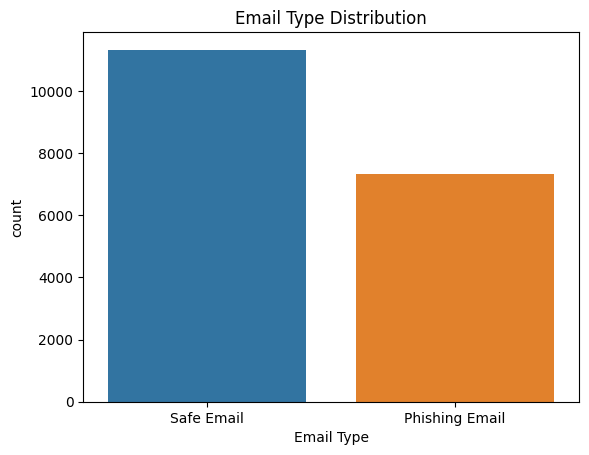

In [69]:
# Sınıf dağılımını görselleştirme
sns.countplot(x='Email Type', data=df)
plt.title('Email Type Distribution')
plt.show()


In [70]:
# Hedef değişkeni sayısal formata dönüştürme
y = df['Email Type'].map({'Safe Email': 0, 'Phishing Email': 1})

In [71]:
# Özellikler (X) ve hedef değişken (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Lojistik Regresyon Modeli
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred_logistic = logistic_model.predict(X_test)

# Model performansını değerlendirme
print("Lojistik Regresyon Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))

print("\nLojistik Regresyon Classification Report:")
print(classification_report(y_test, y_pred_logistic))

Lojistik Regresyon Confusion Matrix:
[[2123   86]
 [  41 1477]]

Lojistik Regresyon Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2209
           1       0.94      0.97      0.96      1518

    accuracy                           0.97      3727
   macro avg       0.96      0.97      0.96      3727
weighted avg       0.97      0.97      0.97      3727



In [73]:
# Naive Bayes Modeli
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred_nb = nb_model.predict(X_test)

# Model performansını değerlendirme
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Confusion Matrix:
[[2152   57]
 [ 136 1382]]

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2209
           1       0.96      0.91      0.93      1518

    accuracy                           0.95      3727
   macro avg       0.95      0.94      0.95      3727
weighted avg       0.95      0.95      0.95      3727



In [74]:
# KMeans modelini tüm veri ile eğit
kmeans = KMeans(n_clusters=2, n_init=20, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=20, random_state=42)

In [75]:
# Küme etiketlerini al
labels = kmeans.labels_

# Küme merkezlerini al
centroids = kmeans.cluster_centers_

# Küme etiketlerini veri çerçevesine ekleme
df['cluster'] = labels

# Sonuçları yazdır
print("KMeans Küme Merkezleri:")
print(centroids)

print("\nVeri Çerçevesi ile Küme Etiketleri:")
print(df.head())

KMeans Küme Merkezleri:
[[1.65521144e-02 2.23617590e-02 1.85421690e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.31904731e-02 1.00862798e-02 9.77532348e-04 ... 1.74310369e-03
  2.21028850e-04 1.04115459e-04]]

Veri Çerçevesi ile Küme Etiketleri:
   Unnamed: 0                                         Email Text  \
0           0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1           1  the other side of * galicismos * * galicismo *...   
2           2  re : equistar deal tickets are you still avail...   
3           3  \nHello I am your hot lil horny toy.\n    I am...   
4           4  software at incredibly low prices ( 86 % lower...   

       Email Type  cluster  
0      Safe Email        1  
1      Safe Email        1  
2      Safe Email        0  
3  Phishing Email        1  
4  Phishing Email        1  


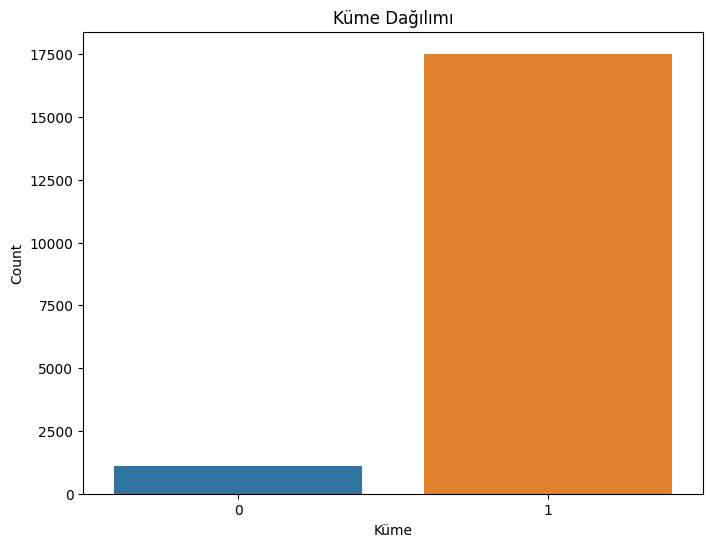

In [76]:
# Küme dağılımını görselleştirme
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='cluster')
plt.title('Küme Dağılımı')
plt.xlabel('Küme')
plt.ylabel('Count')
plt.show()

In [77]:
# İlk 10 e-postayı ve hangi kümeye ait olduklarını yazdırma
print(df[['Email Text', 'cluster']].head(10))

                                          Email Text  cluster
0  re : 6 . 1100 , disc : uniformitarianism , re ...        1
1  the other side of * galicismos * * galicismo *...        1
2  re : equistar deal tickets are you still avail...        0
3  \nHello I am your hot lil horny toy.\n    I am...        1
4  software at incredibly low prices ( 86 % lower...        1
5  global risk management operations sally congra...        1
6  On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...        1
7  entourage , stockmogul newsletter ralph velez ...        1
8  we owe you lots of money dear applicant , afte...        1
9  re : coastal deal - with exxon participation u...        0


In [78]:
# Lojistik Regresyon Modeli
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred_logistic = logistic_model.predict(X_test)

# Performans metriklerini hesaplama
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
class_report_logistic = classification_report(y_test, y_pred_logistic)

# Sonuçları yazdırma
print("Lojistik Regresyon Accuracy Score:")
print(accuracy_logistic)

print("\nLojistik Regresyon Confusion Matrix:")
print(conf_matrix_logistic)

print("\nLojistik Regresyon Classification Report:")
print(class_report_logistic)

Lojistik Regresyon Accuracy Score:
0.9659243359270191

Lojistik Regresyon Confusion Matrix:
[[2123   86]
 [  41 1477]]

Lojistik Regresyon Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2209
           1       0.94      0.97      0.96      1518

    accuracy                           0.97      3727
   macro avg       0.96      0.97      0.96      3727
weighted avg       0.97      0.97      0.97      3727



KMeans Silhouette Score:
0.015670977181218418


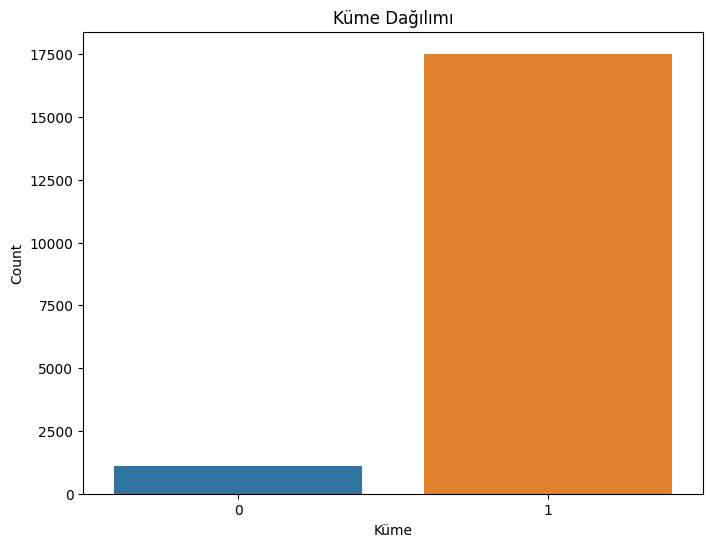

In [79]:
# KMeans Kümeleme Modeli
# KMeans modelini oluşturma ve eğitme
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X)

# Küme etiketlerini alma
labels = kmeans.labels_

# Silhouette Skoru
silhouette_avg = silhouette_score(X, labels)

print("KMeans Silhouette Score:")
print(silhouette_avg)

# Küme dağılımını görselleştirme
df['cluster'] = labels  # Yeni etiketleri veri çerçevesine ekleme
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='cluster')
plt.title('Küme Dağılımı')
plt.xlabel('Küme')
plt.ylabel('Count')
plt.show()

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# Lojistik Regresyon için hiperparametre aralıkları
param_dist = {
    'C': uniform(loc=0.01, scale=10),  # C parametresi için uniform dağılım
    'penalty': ['l1', 'l2'],            # Cezalandırma türleri
    'solver': ['liblinear', 'saga']     # Çözücüler
}

# Lojistik regresyon modelini oluşturma
logistic_model = LogisticRegression(max_iter=1000)

# RandomizedSearchCV ile hiperparametre optimizasyonu
random_search = RandomizedSearchCV(logistic_model, param_distributions=param_dist, 
                                   n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Eğitim verileri üzerinde fit etme
random_search.fit(X_train, y_train)

# En iyi hiperparametreleri ve sonuçları yazdırma
print("En iyi hiperparametreler:")
print(random_search.best_params_)

print("\nEn iyi sonuç:")
print("Accuracy:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
En iyi hiperparametreler:
{'C': 6.021150117432088, 'penalty': 'l2', 'solver': 'liblinear'}

En iyi sonuç:
Accuracy: 0.9712886960587184


In [81]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# En iyi model ile tahmin yapma
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Performans metriklerini hesaplama
print("En İyi Model Karışıklık Matrisi:")
print(confusion_matrix(y_test, y_pred_best))

print("\nEn İyi Model Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_best))

print("\nEn İyi Model Doğruluk Skoru:")
print(accuracy_score(y_test, y_pred_best))

En İyi Model Karışıklık Matrisi:
[[2125   84]
 [  27 1491]]

En İyi Model Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2209
           1       0.95      0.98      0.96      1518

    accuracy                           0.97      3727
   macro avg       0.97      0.97      0.97      3727
weighted avg       0.97      0.97      0.97      3727


En İyi Model Doğruluk Skoru:
0.9702173329755835


Karışıklık Matrisi:
[[2123   86]
 [  41 1477]]

Doğruluk (Accuracy): 0.97
Kesinlik (Precision): 0.97
Duyarlılık (Recall): 0.97
F1 Puanı (F1 Score): 0.97


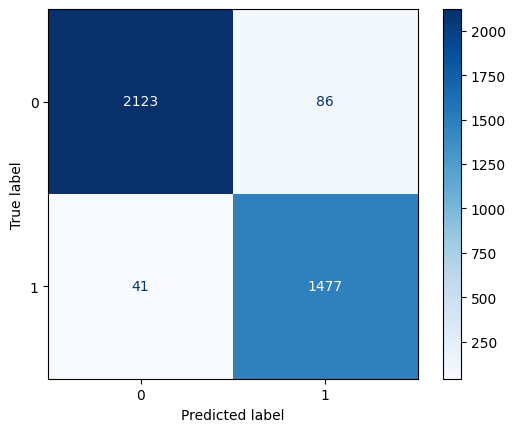

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Modeli tanımlayın ve eğitin
logistic_regression = LogisticRegression(max_iter=1000)  
logistic_regression.fit(X_train, y_train)

# Tahminlerinizi yapın
y_pred = logistic_regression.predict(X_test)

# Karışıklık matrisini oluşturun
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_regression.classes_)

# Performans metriklerini hesaplayın
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Sonuçları yazdırın
print("Karışıklık Matrisi:")
print(cm)
print("\nDoğruluk (Accuracy): {:.2f}".format(accuracy))
print("Kesinlik (Precision): {:.2f}".format(precision))
print("Duyarlılık (Recall): {:.2f}".format(recall))
print("F1 Puanı (F1 Score): {:.2f}".format(f1))

# Karışıklık matrisini görselleştirin
disp.plot(cmap='Blues')